In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [206]:
## config
num_lines = 1
image_size = (100,100)

## segment
segment_threshold = 3
slope_threshold = 2

# Generating trail data

In [207]:
# create some examples for us to understand 

def create_examples(num_lines=num_lines, image_size=image_size):
    """
    This function creates an image with random straight lines with different slopes,
    broken into different segments for image processing tasks.
    """

    image = np.zeros(image_size, dtype=np.uint8)

    for _ in range(num_lines):
        # Random slope (positive or negative)
        slope = np.random.uniform(-2, 2)  

        # Random intercept
        intercept = np.random.randint(0, image_size[1])  

        # Generate x-values
        for i in range(image_size[0]):
            x = int(slope * i + intercept)

            # Ensure the point is within bounds
            if 0 <= x < image_size[1] and random.random() > 0.2:  # 20% chance of missing pixels to break the line
                image[i, x] = 1

    return image

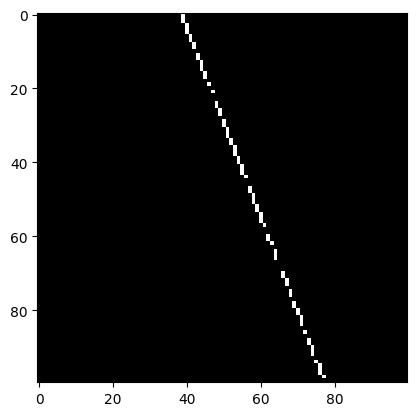

In [208]:
plt.imshow(create_examples(), cmap='gray')

# Identify Segments

In [209]:
def find_segments(image=create_examples()):
    """
    This function takes an image and returns the segments and slopes of the lines in the image.
    the segments are defined by the segment_threshold ( no of minimum pixels in a segment)
    """

    # plot the original image
    plt.imshow(image, cmap='gray')
    plt.show()
    
    segments = {}

    # finding the individual segments
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] == 1:

                # print(f"on pixel {i},{j}")

                # neighbours considere wil be shape of 1,1
                neighbours = [(i-1,j-1), (i-1,j), (i-1,j+1), (i,j-1), (i,j+1), (i+1,j-1), (i+1,j), (i+1,j+1)]

                # checking which nieghbours are 1
                neighbours_1 = [neighbour for neighbour in neighbours if neighbour[0] >= 0 and neighbour[0] < image.shape[0] and neighbour[1] >= 0 and neighbour[1] < image.shape[1] and image[neighbour[0],neighbour[1]] == 1]

                # print(f"with 1s are {neighbours_1}")

                # now this nieghbours_1 can be part of different segments , we will vote based on rules
                # 1. if only one neighbour is 1, then it is part of that segment
                # 2. if more than one neighbour is 1, then it is part of the segment with most no of pixels
                # 3. if no neighbour is 1, then it is a new segment

                if len(neighbours_1) == 0:
                    # new segment
                    segments[segments.__len__()] = [(i,j)]
                else:
                    # part of some segment
                    segment_ids = [segment_id for segment_id, segment in segments.items() if neighbours_1[0] in segment]
                    if len(segment_ids) == 1:
                        # part of only one segment
                        segments[segment_ids[0]].append((i,j))
                    elif len(segment_ids) ==0:
                        # in starting if niebhour is 1 but still not put in any segment
                        segments[segments.__len__()] = [(i,j)]
                    else:
                        # part of multiple segments
                        segment_id = max(segment_ids, key=lambda x: len(segments[x]))
                        segments[segment_id].append((i,j))
                        
    return segments,image

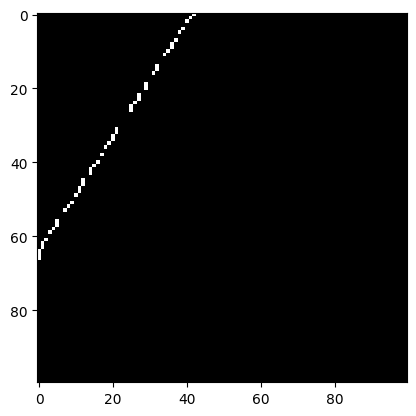

({0: [(0, 42), (1, 41), (2, 40)],
  1: [(4, 39), (5, 38)],
  2: [(7, 37), (8, 36), (9, 36), (10, 35), (11, 34)],
  3: [(14, 32), (15, 32), (16, 31)],
  4: [(19, 29), (20, 29)],
  5: [(22, 27), (23, 27), (24, 26), (25, 25), (26, 25)],
  6: [(31, 21), (32, 21), (33, 20), (34, 20), (35, 19), (36, 18)],
  7: [(38, 17)],
  8: [(40, 16), (41, 15), (42, 14), (43, 14)],
  9: [(45, 12), (46, 12), (47, 11), (48, 11), (49, 10)],
  10: [(51, 9), (52, 8), (53, 7)],
  11: [(56, 5), (57, 5), (58, 4), (59, 3)],
  12: [(61, 2), (62, 1), (63, 1), (64, 0), (65, 0), (66, 0)]},
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [210]:
find_segments(create_examples())

In [211]:
def calc_slope(x, y):
    """
    This function takes a segment and returns the slope of the line.
    """

    if len(x) == 1:
        return 0

    if y[-1] == y[0]:
        return 1000
    
    # calculate the slope
    slope = (x[-1] - x[0]) / (y[-1] - y[0])

    return slope

In [212]:
def merging_segments(segments,image, slope_threshold = slope_threshold):
    """
    This function takes the segments and merges them based on the slope of the lines.4

    slope_threshold: the maximum difference in slope between two segments to merge them.
    """

    # getting the slopes of the segments
    slopes = {}
    for segment_id, segment in segments.items():
        x = [point[0] for point in segment]
        y = [point[1] for point in segment]
        slope = calc_slope(x,y)
        slopes[segment_id] = slope

    print(f"slopes are {slopes}")

    # merging the segments
    merged_segments = {}

    for slope_id, slope in slopes.items():
        if len(merged_segments) == 0:
            merged_segments[slope_id] = {'segments': [slope_id], 'slope': slope}
        else:
            # check if the slope is similar to the previous segment
            if abs(slope - merged_segments[list(merged_segments.keys())[-1]]['slope']) < slope_threshold:
                merged_segments[list(merged_segments.keys())[-1]]['segments'].append(slope_id)
                merged_segments[list(merged_segments.keys())[-1]]['slope'] = (merged_segments[list(merged_segments.keys())[-1]]['slope'] + slope) / 2
            else:
                merged_segments[slope_id] = {'segments': [slope_id], 'slope': slope}
        

    print(f"len of segments {len(segments)}")
    print(f"len of merged segments {len(merged_segments)}")
    
    final_merged_segments = []

    for id,value in merged_segments.items():
        merged_segment = []
        for segment_id in value['segments']:
            merged_segment += segments[segment_id]
        final_merged_segments.append(merged_segment)

    return final_merged_segments,image

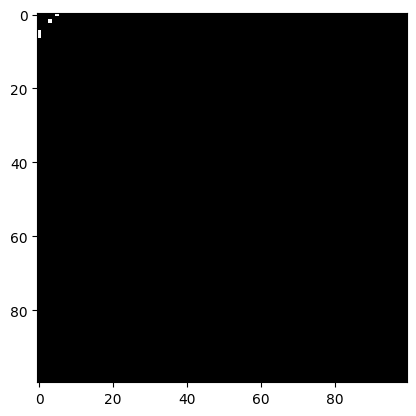

slopes are {0: 0, 1: 0, 2: 1000}
len of segments 3
len of merged segments 2


In [213]:
image = create_examples()
segments,image = find_segments(image)
final_merged_segments,image = merging_segments(segments,image)

In [216]:
def merge_lines_in_image(segments,image):
    """
    This function takes an image and returns the merged segments of the lines in the image.
    """

    print(f"final_merged segments are {segments}")

    points_to_1 = []

    # in every segment there is a line, we will find the points on the line which are not in the segment
    # we will try to deal in integer points only

    for segment in segments:
        
        for idx,point in enumerate(segment):

            # find all the points on the line between this point and the next point

            if idx == len(segment) - 1:
                break

            x1,y1 = point
            x2,y2 = segment[idx+1]

            # print(f"points are {x1,y1} and {x2,y2}")

            slope = calc_slope([y1,y2],[x1,x2])

            if slope == 0:
                for y in range(y1,y2):
                    points_to_1.append((x1,y))
            else:
                for y in range(y1,y2):
                    x = int((y - y1)/slope + x1)
                    points_to_1.append((x,y))

    print(f"points to 1 are {points_to_1}")

    # put these points to 1 in the image
    for point in points_to_1:
        x,y = point
        if x >= 0 and x < image.shape[0] and y >= 0 and y < image.shape[1]:
            image[x,y] = 1

    plt.imshow(image, cmap='gray')
    

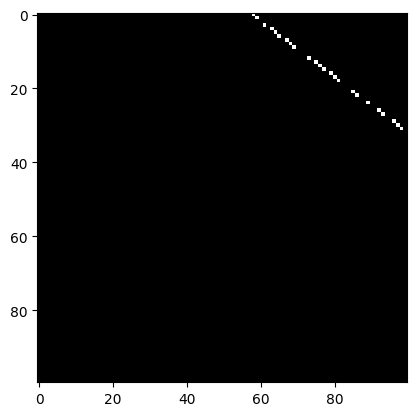

slopes are {0: 1.0, 1: 0, 2: 1.0, 3: 1.0, 4: 0, 5: 1.0, 6: 1.0, 7: 1.0, 8: 0, 9: 1.0, 10: 1.0}
len of segments 11
len of merged segments 1
final_merged segments are [[(0, 58), (1, 59), (3, 61), (4, 63), (5, 64), (6, 65), (7, 67), (8, 68), (9, 69), (12, 73), (13, 75), (14, 76), (15, 77), (16, 79), (17, 80), (18, 81), (21, 85), (22, 86), (24, 89), (26, 92), (27, 93), (29, 96), (30, 97), (31, 98)]]
points to 1 are [(0, 58), (1, 59), (2, 60), (3, 61), (3, 62), (4, 63), (5, 64), (6, 65), (6, 66), (7, 67), (8, 68), (9, 69), (9, 70), (10, 71), (11, 72), (12, 73), (12, 74), (13, 75), (14, 76), (15, 77), (15, 78), (16, 79), (17, 80), (18, 81), (18, 82), (19, 83), (20, 84), (21, 85), (22, 86), (22, 87), (23, 88), (24, 89), (24, 90), (25, 91), (26, 92), (27, 93), (27, 94), (28, 95), (29, 96), (30, 97)]


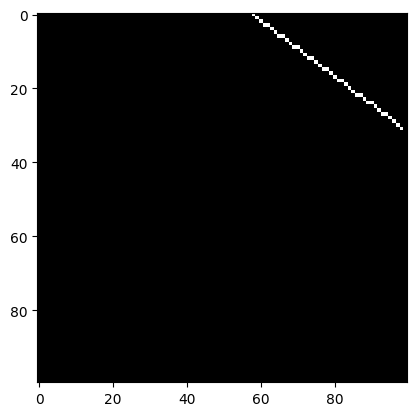

In [222]:
# testing the pipeline
image = create_examples()
segments,image = find_segments(image)
segments,image = merging_segments(segments,image)
merge_lines_in_image(segments,image)